# Training a Simple Image Classifier using Convolutional Neural Networks 

## Identifying Handwritten Digits (MNIST)

__Objective__: Create a CNN (Convolutional Neural Network) model. Use this model to classify handwritten digits.

__Workflow__:
1.  Load in the `MNIST` dataset and examine its structure.
    - Use any library to load the MNIST dataset (included with both TensorFlow and PyTorch modules).
    - Take a closer look at the data inspecting its size, shape, and quantity.
    - View some random samples using either OpenCV or Matplotlib (or other libraries) of the handwritten digits and observe the complexity of the images. Do you have any issues identify these written numbers?
2.  2.  Using `numpy` or other libraries prepare your dataset for training.
    - Ensure the format or shape of the data is appropriate for input into your model (one-hot-encoding is needed for the labels)
    - Ensure data types are correct and that data is normalized. 
3.  Create a CNN with these specifications:
    - Input Dimensions of 28 x 28 x 1 
    - Two Convolution Layers (Kernel Size 3x3). The first with 64 filters, the second with 32. Use `ReLU` as the activation layer.
    - Max Pooling of size 2 x 2
    - Dropout Rate of 0.25
    - Add a Dense Layer comprising of 128 outputs
    - Add another Dropout Layer using a rate setting of 0.5
    - Add the final Dropout Layer that indicates the class probabilities
4.  Train this CNN on the `MNIST` dataset your prepared in Step 2
    - Train for at least 10 Epochs using a batch size of 32
5.  Plot graphs showing how your training and validation loss and accuracy changed with respect to the Epochs completed. 
6.  Save your model, you will be using it in the second milestone.
7.  Test your model on some random samples from the test dataset.

__Deliverable__:

The deliverable is a Jupyter Notebook documenting your workflow as you take the `MNIST` dataset, view samples, convert it into the right shape/format as required by your deep learning library. You are required to train the model using the specifications provided. You should save your model as you'll need it for further analysis in the second milestone.

# Resources
Deep Learning with Python, Second Edition 
- 1.2 [Chapter 5 Deep learning for computer vision](https://livebook.manning.com/book/deep-learning-with-python/chapter-5/1
)
    - 5.1 Introduction to covnets
        - 5.1.1 The convolution operation
        - 5.1.2 The max-pooling operation



### Load our Handwritten Digit Dataset (MNIST)

In [1]:
from tensorflow.keras.datasets import mnist

# Loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

2023-03-15 11:39:08.282068: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape) + "\n")

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)) + "\n")

print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape) + "\n")

print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)

Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


### Let's take a look at some of images in this dataset


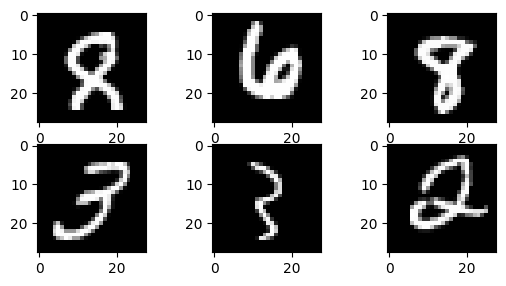

In [3]:
# importing matplotlib
# You may need to run this twice as sometimes matplotlib doesn't generate the plot in the same cell where it was imported
import matplotlib.pyplot as plt
import numpy as np

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

### Preparing our dataset for Keras

- Keras requires our input data as a 4-Dimensional shape of (60000,28,28,1). When we initially loaded our data, x_train was (60000,28,28).
- We needs our labels to be one-hot-encoded

In [4]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image for future use as a variable storing our input shape
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Performing one-hot-econding of our data labels

In [5]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]

Number of Classes: 10


# Creating our Convolution Neural Network Model

![alt text](https://raw.githubusercontent.com/rajeevratan84/MasterOpenCV/master/CNN2.JPG "Our Convolutional Neural Network")


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# create model
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 26 x 26 x 32
# We use ReLU activation and specify our input_shape which is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 24 x 24 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# We then Flatten our tensor object before input into our Dense Layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is 
# equal to the number of elements contained in tensor
# In our CNN it goes from 12 * 12 * 64 to 9216 * 1
model.add(Flatten())

# We connect this layer to a Fully Connected/Dense layer of size 1 * 128
model.add(Dense(128, activation='relu'))

# We use another Dropout layer
model.add(Dropout(0.5))

# We create our final Fully Connected/Dense layer with an output for each class (10)
model.add(Dense(num_classes, activation='softmax'))

# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.01)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         


2023-03-15 11:40:36.494885: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________
None


# Training our CNN

In [7]:
batch_size = 32
epochs = 10

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.5976 - accuracy: 0.8119 - val_loss: 0.1978 - val_accuracy: 0.9414
Epoch 2/10
1875/1875 [==============================] - 102s 55ms/step - loss: 0.2705 - accuracy: 0.9198 - val_loss: 0.1231 - val_accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1920 - accuracy: 0.9418 - val_loss: 0.0871 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.1513 - accuracy: 0.9548 - val_loss: 0.0701 - val_accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1258 - accuracy: 0.9613 - val_loss: 0.0590 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1077 - accuracy: 0.9678 - val_loss: 0.0544 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0995 - accuracy: 0.9693 - val_loss: 0.05

## Plotting our training progress 
Plot our Loss vs Epochs

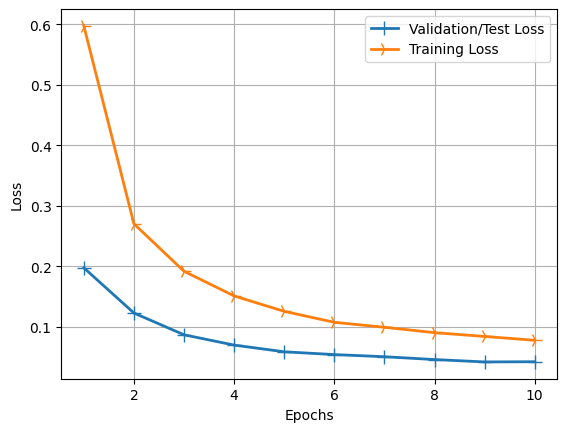

In [8]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

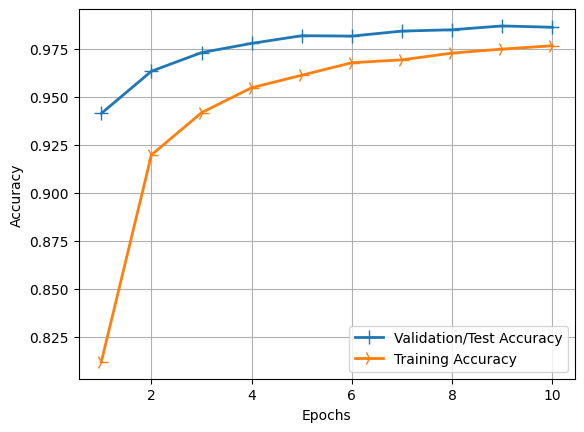

In [9]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Saving and loading your model

In [10]:
model.save("mnist_simple_cnn_10_Epochs.h5")

print("Model Saved")

Model Saved


In [11]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

# Testing out Model on some random Test Data

1/1 [==============================] - 0s 17ms/step
1			

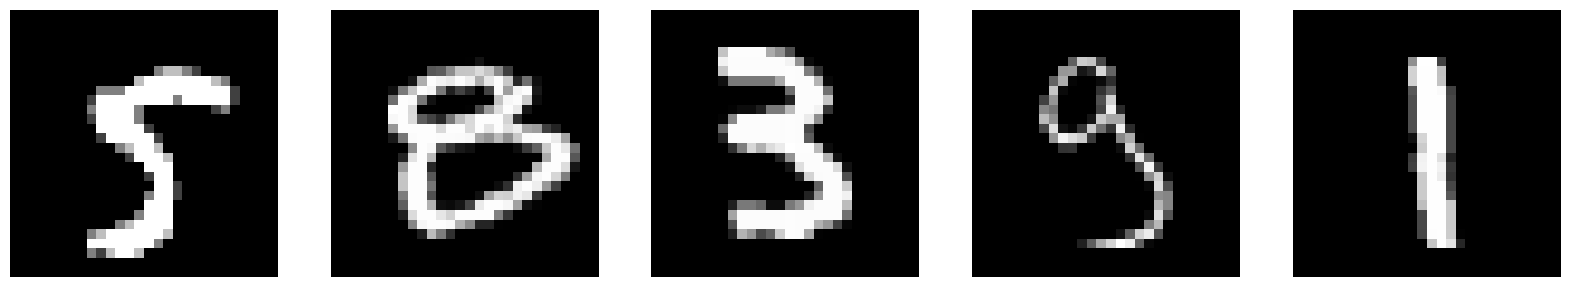

In [12]:
import numpy as np

figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,28,28,1)),axis=1),axis=0),end="\t\t\t")

# Summary

In this notebook we:

* Loaded the MNIST Dataset
* Trained a Convolutional Neural Network on the MNIST dataset
* Tested our model on some of test data

The end deliverable from this section is a trained CNN using the architecture described for at least 10 epochs. The expected accuracy of your model should be at least 98%. In the next section, we will use the model you saved and try to understand what the model actually 'learnt'.